In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import(
    QuantumCircuit,
    QuantumRegister,
    execute,
    Aer)
from qiskit.quantum_info.operators import Operator

#imports

0


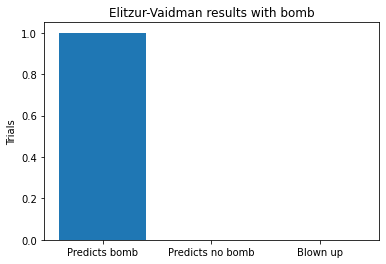

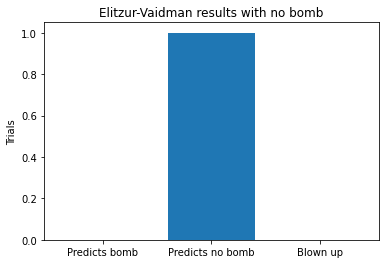

In [70]:
#number of trials to determine whether bomb is predicted/explode or a dud/fake
#10 is inconsistent max trials; 20+ trials is more consistent for predicting bomb without exploding

inputTrials = 10

rotations = inputTrials
e = np.pi/(2*rotations)
shots = 1


#applied rotations until you can predict the bomb (depending on # trials)
def elitzur_vaidman(bomb):
    measurements = rotations + 1 if bomb else 1
    circuit = QuantumCircuit(1, measurements)

    rotate = Operator([
        [np.cos(e), -np.sin(e)],
        [np.sin(e), np.cos(e)]])

    for i in range(rotations):
        circuit.unitary(rotate, [0], label='Re')
        if bomb:
            circuit.measure(0, i)

    circuit.measure(0, measurements - 1)

#code to show the predict of real and fake bomb
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(circuit, simulator, shots=shots)
    result = job.result()
    counts = result.get_counts(circuit) #returns a hash map
    predict_bomb = predict_no_bomb = blown_up = 0
    if bomb:
        predict_bomb = counts['0' * measurements] if '0' * measurements in counts else 0 #checks to see if there's a key in hash map
        zeros_one = '0' * (predict_no_bomb - 1) + '1'
        predict_no_bomb = counts[zeros_one] if zeros_one in counts else 0
        blown_up = shots - predict_bomb - predict_no_bomb
    else:
        predict_bomb = counts['0'] if '0' in counts else 0
        predict_no_bomb = counts['1']
        blown_up = 0

    y_pos = np.arange(3)
    plt.bar(y_pos, [predict_bomb, predict_no_bomb, blown_up])
    plt.xticks(y_pos, ['Predicts bomb', 'Predicts no bomb', 'Blown up'])
    plt.ylabel('Trials')
    plt.title('Elitzur-Vaidman results with' +
              (' ' if bomb else ' no ') + 'bomb')

    plt.show()
elitzur_vaidman(bomb=True)
elitzur_vaidman(bomb=False)